In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

X_test = X_test/255

In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_valid = np.expand_dims(X_valid,-1)
print(X_train.shape,X_test.shape,X_valid.shape)

(55000, 28, 28, 1) (10000, 28, 28, 1) (5000, 28, 28, 1)


In [8]:
input_shape = (28, 28, 1)
CLASSES = 10

LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [9]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [10]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [11]:
CNN_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [12]:
history = CNN_model.fit(
    X_train, y_train, epochs=10,validation_data = (X_valid, y_valid)
)

Epoch 1/10
1719/1719 [==============================] - 15s 4ms/step - loss: 0.6191 - accuracy: 0.8294 - val_loss: 0.2241 - val_accuracy: 0.9322
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1804 - accuracy: 0.9470 - val_loss: 0.1383 - val_accuracy: 0.9616
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1270 - accuracy: 0.9625 - val_loss: 0.1100 - val_accuracy: 0.9696
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1035 - accuracy: 0.9695 - val_loss: 0.0926 - val_accuracy: 0.9720
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.9739 - val_loss: 0.0866 - val_accuracy: 0.9752
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0779 - val_accuracy: 0.9784
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9783 - val_loss: 0.0692 - val_accurac

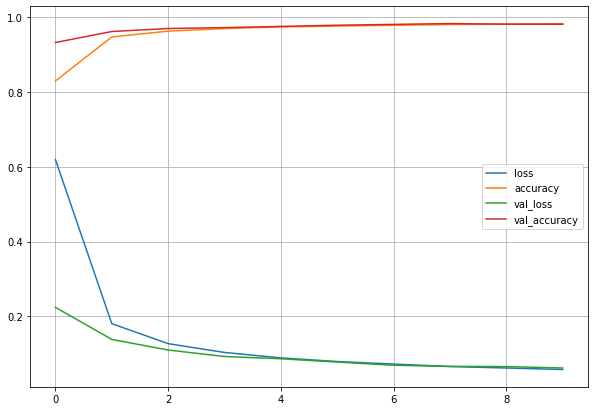

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [14]:
CNN_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9830


[0.05313514918088913, 0.9829999804496765]

In [15]:
CNN_model.save("mnist_cnn.h5")

In [16]:
X_new = X_test[:3]

y_prob = CNN_model.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.002, 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [17]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

In [22]:
tf.reduce_dims(img_array,-1)

AttributeError: ignored

TypeError: ignored

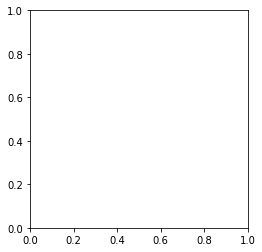

In [18]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Transfer Learning

## Even Odd usecase for CNN Model

In [ ]:
def update_labels(labels):
    for idx,label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0 , 1 , 0)
    return labels

In [ ]:
y_train_bin, y_test_bin, y_valid_bin = update_labels([y_train, y_test, y_valid]) 

In [ ]:
pretrained_model = tf.keras.models.load_model("mnist_cnn.h5")

In [ ]:
pretrained_model.summary()

In [ ]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

In [ ]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [ ]:
pretrained_model.summary